In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [46]:
data=pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")

In [47]:
'''#Reading data from link
data = cars
cars = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
cars = pd.DataFrame(data = cars)
print("Data has been imported.")'''

'#Reading data from link\ndata = cars\ncars = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")\ncars = pd.DataFrame(data = cars)\nprint("Data has been imported.")'

In [48]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
data.shape

(205, 26)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Data is very clean no null values present**

#  DATA VISUALIZATION

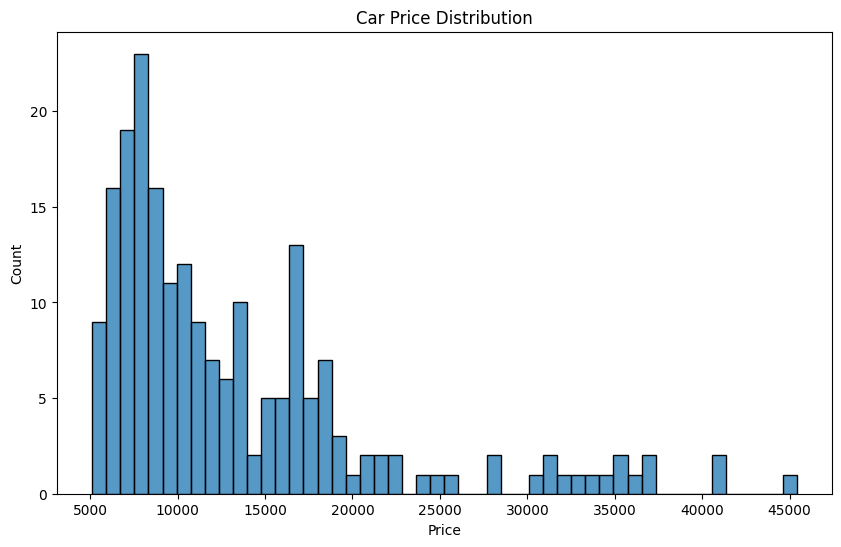

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(data["price"],bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Car Price Distribution")
plt.show()

<Axes: xlabel='fueltype'>

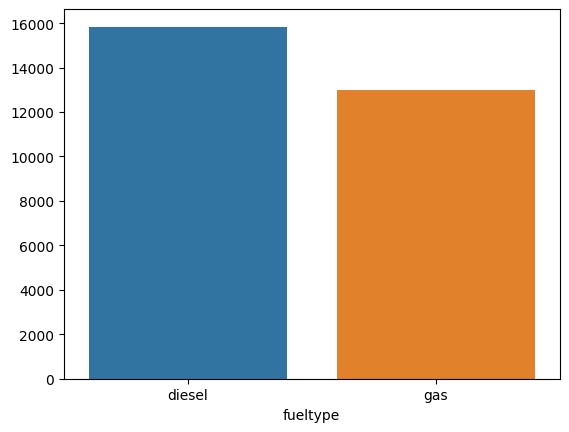

In [52]:
carfuel = data.groupby("fueltype")["price"].mean()
sns.barplot(x=carfuel.index,y=carfuel.values)

**CarName:Bar Plot**

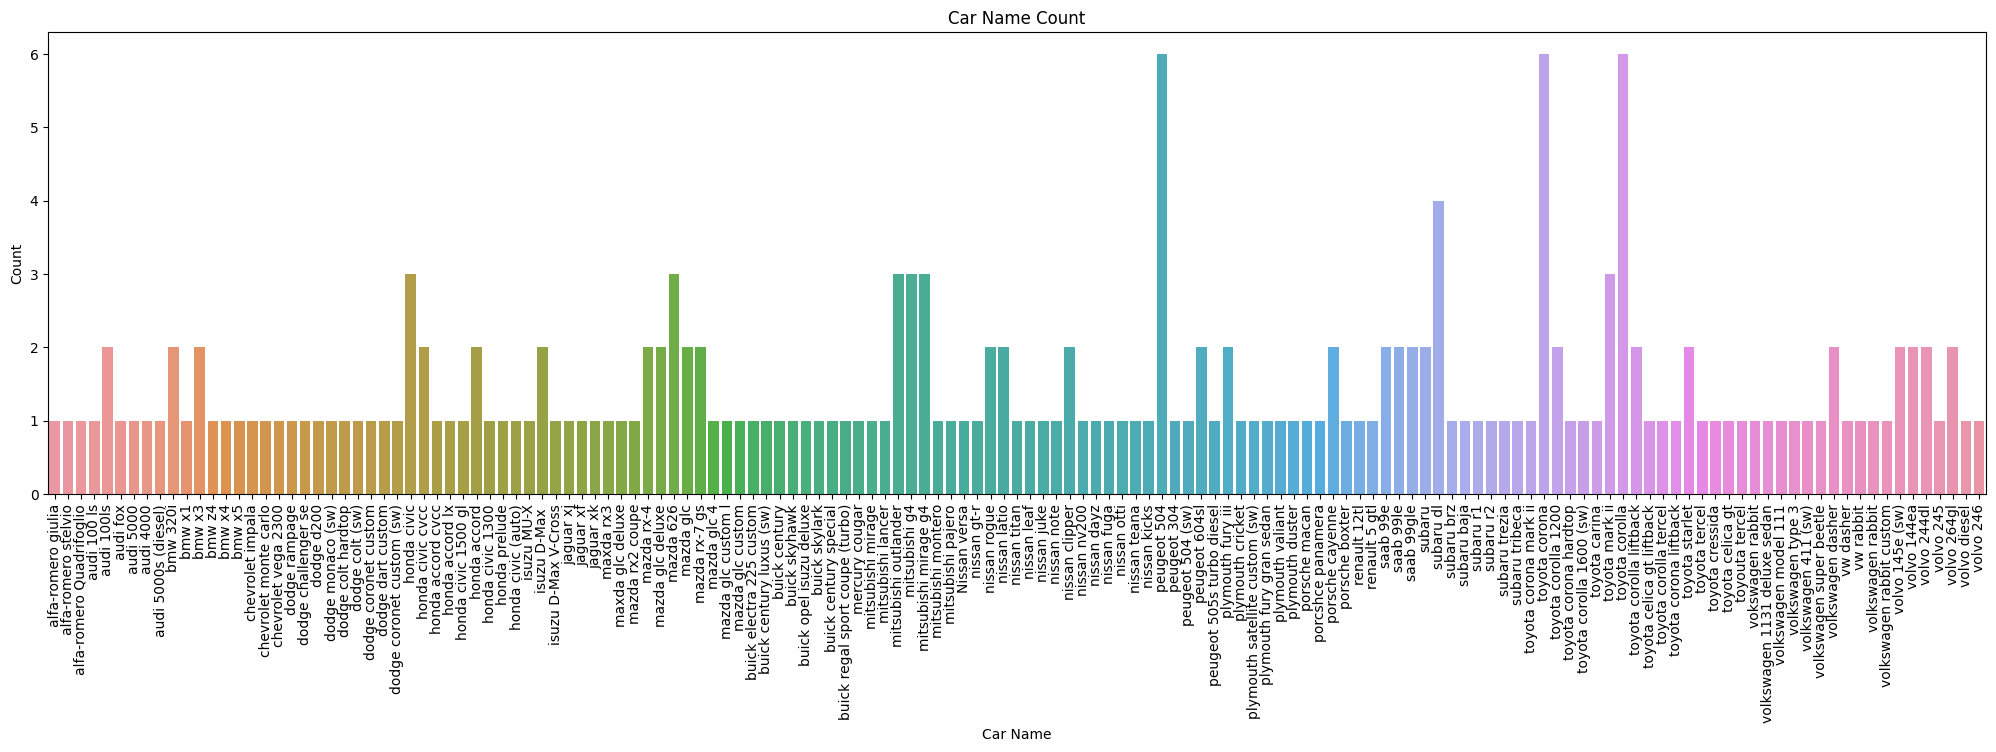

In [53]:
plt.figure(figsize=(25,6))
sns.countplot(data=data,x='CarName')
plt.title("Car Name Count")
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Symboling : Countplot**

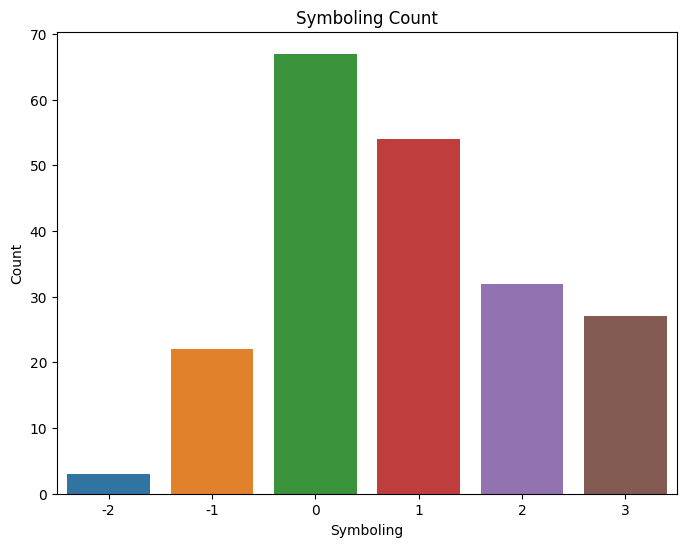

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='symboling')
plt.title("Symboling Count")
plt.xlabel("Symboling")
plt.ylabel("Count")
plt.show()

**HoursPower : Histogram**

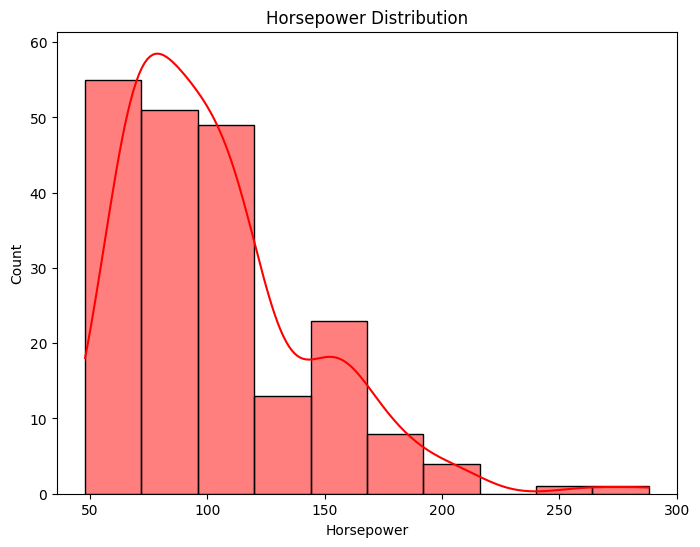

In [55]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x="horsepower",bins=10,kde=True,color='red')
plt.title("Horsepower Distribution")
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.show()

**Engine Size v/s Horsepower : ScatterPlot

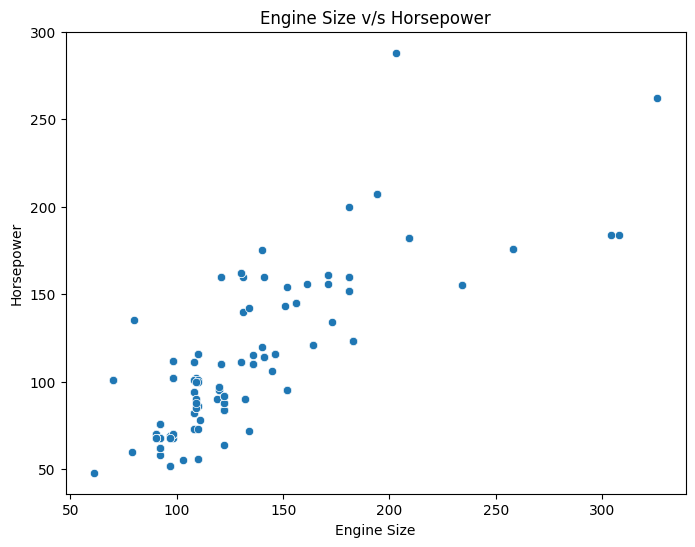

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="enginesize", y="horsepower")
plt.title("Engine Size v/s Horsepower")
plt.xlabel("Engine Size")
plt.ylabel("Horsepower")
plt.show()


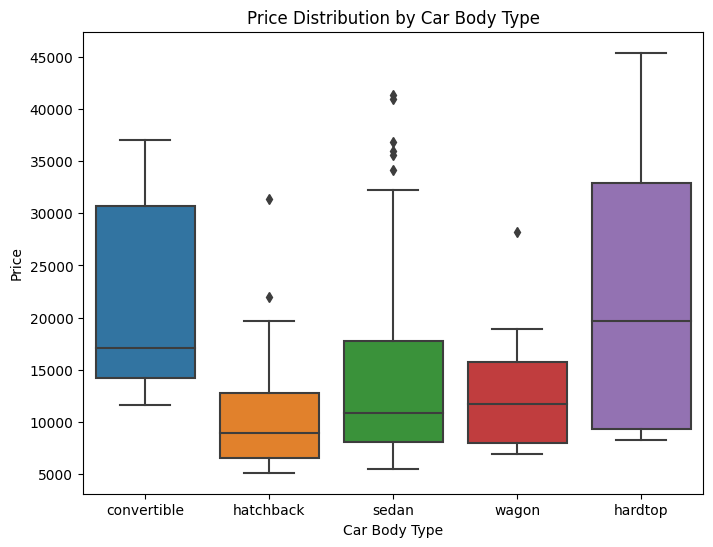

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="carbody", y="price")
plt.title("Price Distribution by Car Body Type")
plt.xlabel("Car Body Type")
plt.ylabel("Price")
plt.show()

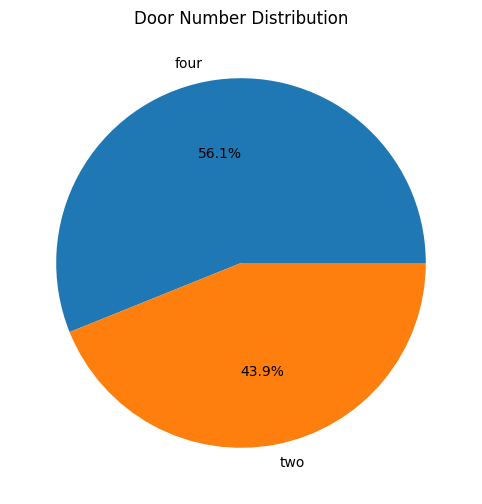

In [58]:
plt.figure(figsize=(8, 6))
fueltype_counts = data['doornumber'].value_counts()
plt.pie(fueltype_counts, labels=fueltype_counts.index, autopct='%1.1f%%')
plt.title("Door Number Distribution")
plt.show()

**CAR PRICE V/S WHEELBASE : SCATTER PLOT**

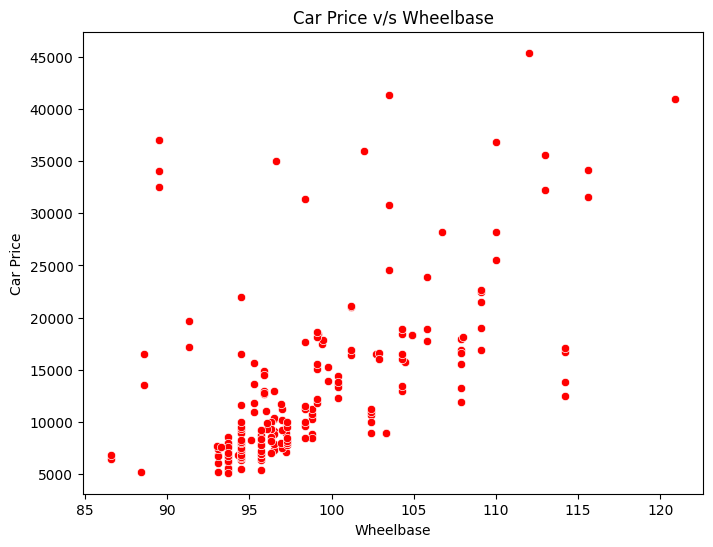

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="wheelbase", y="price",color = 'red')
plt.title("Car Price v/s Wheelbase")
plt.xlabel("Wheelbase")
plt.ylabel("Car Price")
plt.show()

**DATA PREPROCESSING**

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [63]:
data.drop(columns=['car_ID','CarName'],inplace=True)

In [64]:
lb = LabelEncoder()
data['fueltype'] = lb.fit_transform(data['fueltype'])
data['aspiration'] = lb.fit_transform(data['aspiration'])
data['carbody'] = lb.fit_transform(data['carbody'])
data['drivewheel'] = lb.fit_transform(data['drivewheel'])
data['enginelocation'] = lb.fit_transform(data['enginelocation'])
data['enginetype'] = lb.fit_transform(data['enginetype'])
data['fuelsystem'] = lb.fit_transform(data['fuelsystem'])

In [65]:
# Create a mapping dictionary for 'doornumber'
cylindernumber_mapping = {
    'two': 2,
    'three': 3,
    'four' : 4,
    'five' : 5,
    'six' :6,
    'eight' :8,
    'twelve' : 12

}

# Use the map() function to apply the mapping to the 'doornumber' column
data['cylindernumber'] = data['cylindernumber'].map(cylindernumber_mapping)

# Verify the updated 'doornumber' column
print(data['cylindernumber'])

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64


In [66]:
# Create a mapping dictionary for 'doornumber'
doornumber_mapping = {
    'two': 2,
    'four': 4
}

# Use the map() function to apply the mapping to the 'doornumber' column
data['doornumber'] = data['doornumber'].map(doornumber_mapping)

# Verify the updated 'doornumber' column
print(data['doornumber'])

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64


**TRAIN TEST SPLIT**

In [68]:
x = data.drop(columns=['price'])
y = data['price']

In [70]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [71]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_train :",y_test.shape)

Shape of X_train : (164, 23)
Shape of X_test : (41, 23)
Shape of y_train : (164,)
Shape of y_train : (41,)


In [72]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(X_test)

**LINEAR REGRESSION MODEL EVALUATION**

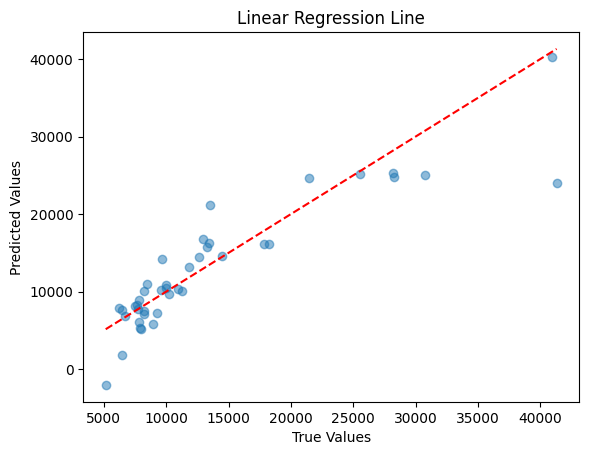

In [74]:
# Scatter plot of the true target values vs. the predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Plot the linear regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set labels and title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Line")

plt.show();

In [75]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3859.520197958704


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [78]:
# Set the feature names to None.
rf_model.feature_names = None

In [79]:
y_pred_dtc = rf_model.predict(X_test)


**RANDOMFOREST MODEL EVALUATION**

In [80]:
# Calculate Mean Squared Error (MSE)
mse_dtc = mean_squared_error(y_test, y_pred_dtc)
print("Mean Squared Error:", mse)

# Calculate R-squared (R²) - Coefficient of Determination
r2 = r2_score(y_test, y_pred_dtc)
print("R-squared (R²):", r2)

Mean Squared Error: 14895896.158451194
R-squared (R²): 0.9580752577084947


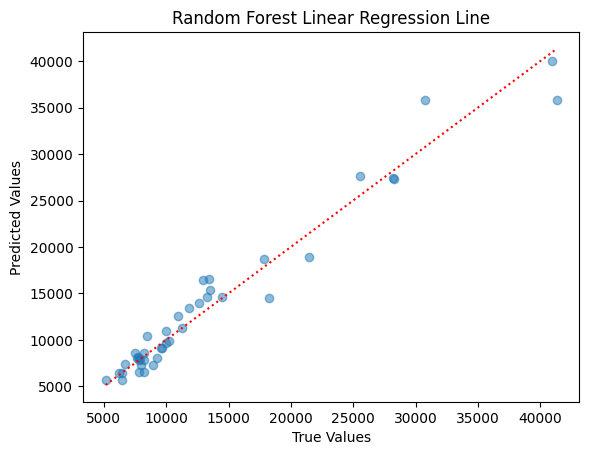

In [81]:
#Scatter plot of the true target values vs. the predicted values
plt.scatter(y_test, y_pred_dtc, alpha=0.5)

# Plot the linear regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted')

# Set labels and title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Linear Regression Line")

plt.show();

In [82]:
import pickle
# Save the model and vectorizer to disk
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [ ]:
print("Car Price Prediction :")
a = float(input("symboling :"))
b = float(input("fueltype :"))
c = float(input("aspiration :"))
d = float(input("doornumber :"))
e = float(input("carbody :"))
f = float(input("drivewheel :"))
g = float(input("enginelocation :"))
h = float(input("wheelbase :"))
i = float(input("carlength :"))
j = float(input("carwidth :"))
k = float(input("carheight :"))
l = float(input("curbweight :"))
m = float(input("enginetype :"))
n = float(input("cylindernumber :"))
o = float(input("enginesize :"))
p = float(input("fuelsystem :"))
q = float(input("boreratio :"))
r = float(input("stroke :"))
s = float(input("compressionratio :"))
t = float(input("horsepower :"))
u = float(input("peakrpm :"))
v = float(input("citympg :"))
w = float(input("highwaympg :"))

features_names = np.array([[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w]])
Result = rf_model.predict(features_names)
print("Car Price Prediction = ",Result)


Car Price Prediction :


symboling : 3
fueltype : 1
aspiration : 0
doornumber : 2
carbody : 0
drivewheel : 2
enginelocation : 0
wheelbase : 88.6
carlength : 168.8
carwidth : 64.1
carheight : 48.8
curbweight : 2548
enginetype : 0
cylindernumber : 4
enginesize : 130
fuelsystem : 5
boreratio : 3.47
stroke : 2.68
